In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Main text figures

Max R  [0.038225   0.04731669]


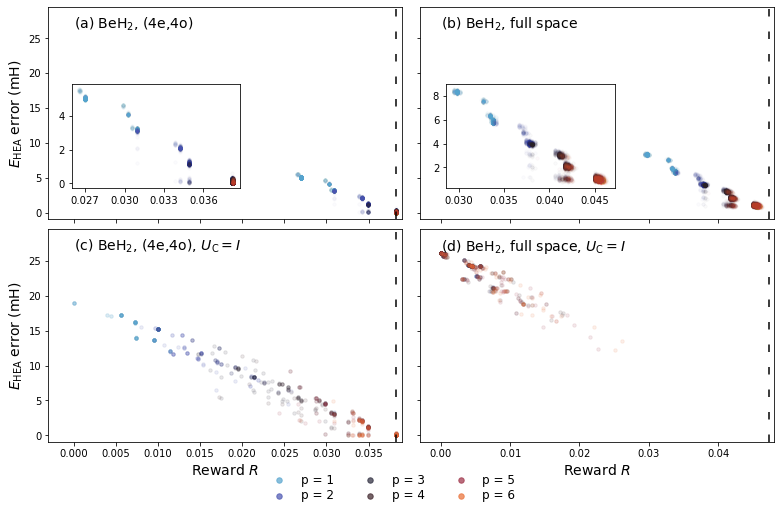

In [3]:
# Figure 2
mol = 'beh2'
mol1 = 'beh2_full'
fig, axes = plt.subplots(2,2, figsize=(13,8), sharey=True)
colors = sns.color_palette('icefire',6)
max_score = [0.1955121485859393, 0.21752400788717913]
print('Max R ', np.square(max_score))

beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol]
beste1 = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol1]
truee = np.load('results/energies.npy', allow_pickle=True).item()[mol]
truee1 = np.load('results/energies.npy', allow_pickle=True).item()[mol1]
yc, yc_rand = {}, {}
yr, yr_rand = {}, {}
scorec, scorec_rand={}, {}
scorer, scorer_rand={}, {}
ax1 = fig.add_axes([0.15, 0.565, 0.18, 0.18])
ax2 = fig.add_axes([0.55, 0.565, 0.18, 0.18])

for i in range(1,7):
    yc[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    scorec[i] = np.load('results/clifford_autotransform/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['score']
    scorer[i] = np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['score']
    yc_rand[i] = 1000* np.subtract(np.load('results/clifford_init/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr_rand[i] = 1000* np.subtract(np.load('results/clifford_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    scorec_rand[i] = np.load('results/clifford_init/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['score_clifford']
    scorer_rand[i] = np.load('results/clifford_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['score_clifford']
for i in range(1,7):
    c = colors[i-1]
    choice = np.random.choice(range(1000), 100, replace=False)
    axes[1][1].scatter(np.square(scorec_rand[i]), np.array(yc_rand[i]), s=12, alpha = 0.1,color = c)
    axes[1][0].scatter(np.square(scorer_rand[i]), np.array(yr_rand[i]), s=12, alpha = 0.1,color = c)
    axes[0][1].scatter(np.square(np.array(scorec[i])), np.array(yc[i]), s=12, alpha = 0.02,color = c)
    axes[0][0].scatter(np.square(np.array(scorer[i])), np.array(yr[i]), s=12, alpha = 0.02,color = c)
    ax2.scatter(np.square(np.array(scorec[i])), np.array(yc[i]), s=12, alpha = 0.02,color = c)
    ax1.scatter(np.square(np.array(scorer[i])), np.array(yr[i]), s=12, alpha = 0.02,color = c)

axes[0][0].axvline(x = np.square(max_score[0]), color = 'k', linewidth=1.5, linestyle=(0, (5, 10)))
axes[1][0].axvline(x = np.square(max_score[0]), color = 'k', linewidth=1.5, linestyle=(0, (5, 10)))
axes[0][1].axvline(x = np.square(max_score[1]), color = 'k', linewidth=1.5, linestyle=(0, (5, 10)))
axes[1][1].axvline(x = np.square(max_score[1]), color = 'k', linewidth=1.5, linestyle=(0, (5, 10)))
axes[0][0].set_ylabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[1][0].set_ylabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
# axes[0][1].xaxis.set_major_formatter('{x:,.3f}') # 2 decimal places
# axes[1][1].xaxis.set_major_formatter('{x:,.3f}') # 2 decimal places
axes[0][0].set_xticklabels('',fontsize=14)
axes[0][1].set_xticklabels('',fontsize=14)
axes[1][0].set_xlabel('Reward $R$',fontsize=14)
axes[1][1].set_xlabel('Reward $R$',fontsize=14)
axes[0][0].set_ylim([-0.7, 19.8])
for i in range(1,7):
    c = colors[i-1]
    axes[0][0].scatter(0.1, -100, s=30, alpha= 0.7, color=c, label='p = {}'.format(i))
axes[0][0].set_xlim([-0.003, 0.039])
axes[1][0].set_xlim([-0.003, 0.039])
axes[0][1].set_xlim([-0.003, 0.048])
axes[1][1].set_xlim([-0.003, 0.048])
#axes.set_xticks([0, 0.03, 0.033, 0.036])
ax1.set_xticks([0.027, 0.03, 0.033, 0.036])
axes[0][0].set_ylim([-0.9, 29.5])
axes[0][1].set_ylim([-0.9, 29.5])
axes[1][0].set_ylim([-0.9, 29.5])
axes[1][1].set_ylim([-0.9, 29.5])
# axes[1][0].set_ylim([-0.3, 9.1])
# axes[1][1].set_ylim([-0.3, 9.1])
plt.subplots_adjust(hspace=0.05, wspace=0.05)
axes[0][0].text(0, 26.5, '(a) BeH$_2$, (4e,4o)', fontsize=14)
axes[0][1].text(0, 26.5, '(b) BeH$_2$, full space', fontsize=14)
axes[1][0].text(0, 26.5, '(c) BeH$_2$, (4e,4o), $U_{\mathrm{C}}=I$', fontsize=14)
axes[1][1].text(0, 26.5, '(d) BeH$_2$, full space, $U_{\mathrm{C}}=I$', fontsize=14)
lgd = axes[0][0].legend(ncol=3, frameon=False,fancybox=False,bbox_to_anchor=(1.35,-1.15),labelspacing=0.2, fontsize=12)
plt.savefig('figures/score_energy_comp_{}.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


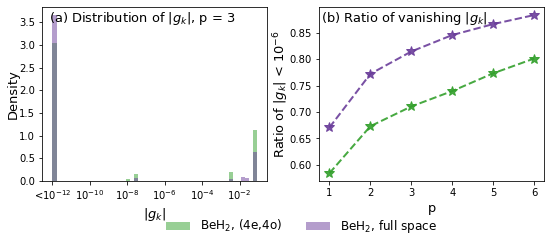

In [204]:
# Figure 3
mol = 'beh2'
mol1 = 'beh2_full'
colors = sns.color_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(9, 3.2))
axes[0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1].set_prop_cycle('color', sns.color_palette("deep", 10))

i=3
data = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol, i), allow_pickle=True).ravel())+1e-12
data1 = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol1, i), allow_pickle=True).ravel())+1e-12
percent=[sum(i<1e-6 for i in data)/len(data), sum(i<1e-6 for i in data1)/len(data1)]
if i == 1:
    sample_size = len(data)
else:
    data = np.random.choice(data, sample_size, replace=False)
axes[0].hist(np.log10(data), bins=50, alpha = 0.5, color=colors[3],density=True, label = 'BeH$_2$, (4e,4o)')
axes[0].hist(np.log10(data1), bins=50, alpha = 0.5, color=colors[9], density=True, label = 'BeH$_2$, full space')
lgd = axes[0].legend(ncol=2, frameon=False,fancybox=False,bbox_to_anchor=(1.8,-0.15),labelspacing=0.1, fontsize=12)

percent = []
for i in range(1,7):
    data = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol, i), allow_pickle=True).ravel())+1e-12
    data1 = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol1, i), allow_pickle=True).ravel())+1e-12
    percent.append([sum(i<1e-6 for i in data)/len(data), sum(i<1e-6 for i in data1)/len(data1)])
percent = np.vstack(percent)
axes[1].plot(range(1,7), percent[:, 0], linestyle='--',marker = '*',color=colors[3], markersize=10, linewidth=2, alpha =0.9)
axes[1].plot(range(1,7), percent[:, 1], linestyle='--',marker = '*',color=colors[9], markersize=10, linewidth=2, alpha =0.9)
axes[1].yaxis.labelpad = -1
axes[0].yaxis.labelpad = -1
axes[1].set_ylabel('Ratio of $|g_k|$ < 10$^{-6}$', fontsize=13)
axes[1].set_xlabel('p', fontsize=13)
axes[0].set_ylabel('Density', fontsize=13)
axes[0].set_xlabel('$|g_k|$', fontsize=13)
axes[0].set_xticks([-12, -10, -8, -6, -4, -2])
axes[0].set_xticklabels(['<10$^{-12}$','10$^{-10}$', '10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$',])

axes[0].text(-12.2,3.5, '(a) Distribution of $|g_k|$, p = 3', fontsize=13)
axes[1].text(0.8,0.87, '(b) Ratio of vanishing $|g_k|$', fontsize=13)
plt.subplots_adjust(hspace=0.05, wspace=0.23)
plt.savefig('figures/grad_radio_{}.pdf'.format(mol), bbox_extra_artists=(lgd, ), bbox_inches='tight')
plt.show()


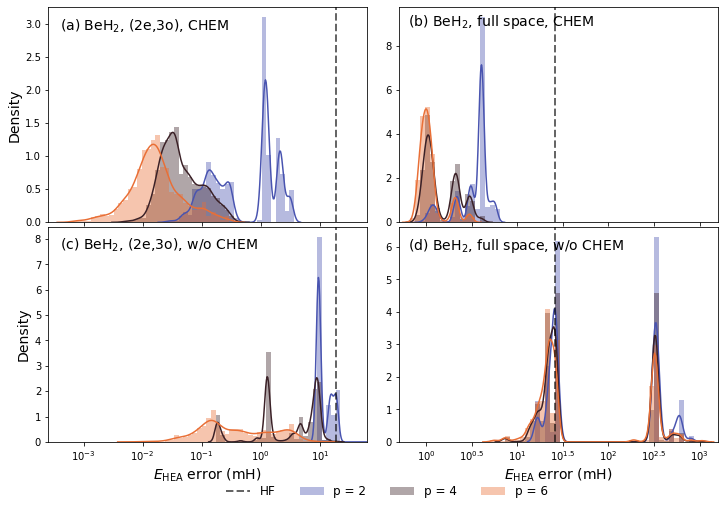

In [3]:
# Fiure 4 & SI Figure S5
mol = 'beh2'
mol1 = 'beh2_full'
import seaborn as sns


fig, axes = plt.subplots(2,2, figsize=(12,8))
colors = sns.color_palette('icefire',6)

beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol]
beste1 = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol1]
truee = np.load('results/energies.npy', allow_pickle=True).item()[mol]
truee1 = np.load('results/energies.npy', allow_pickle=True).item()[mol1]
yc = {}
yr = {}
yc_rand = {}
yr_rand = {}
for i in range(1,7):
    yc[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    yc_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
minv1 = np.min(list(yc.values()))
maxv1 = np.max(list(yc.values()))
minv = np.min(list(yr.values()))
maxv = np.max(list(yr.values()))
minv1_rand = np.min(list(yc_rand.values()))
maxv1_rand = np.max(list(yc_rand.values()))
minv_rand = np.min(list(yr_rand.values()))
maxv_rand = np.max(list(yr_rand.values()))

bws_yr = {1: 0.1,2: 0.1,3: 0.2,4: 0.2,5: 0.2,6: 0.2,}
bws_yc = {1: 0.15,2: 0.15,3: 0.2,4: 0.2,5: 0.2,6: 0.2,}
bws_yr_rand = {1: 0.25,2: 0.25,3: 0.08,4: 0.08,5: 0.2,6: 0.2,}
bws_yc_rand = {1: 0.06,2: 0.06,3: 0.06,4: 0.06,5: 0.06,6: 0.06,}
for i in [2,4,6]:
#for i in range(1,7):
    c = colors[i-1]
    axes[0][1].hist(np.log10(np.array(yc[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),60), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[0][0].hist(np.log10(np.array(yr[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[0][0], data=np.log10(np.array(yr[i])), color = c, bw_method=bws_yr[i])
    sns.kdeplot(ax=axes[0][1], data=np.log10(np.array(yc[i])), color = c, bw_method=bws_yc[i])
    axes[1][1].hist(np.log10(np.array(yc_rand[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),60), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[1][0].hist(np.log10(np.array(yr_rand[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[1][0], data=np.log10(np.array(yr_rand[i])), color = c, bw_method=bws_yr_rand[i])
    sns.kdeplot(ax=axes[1][1], data=np.log10(np.array(yc_rand[i])), color = c, bw_method=bws_yc_rand[i])

axes[1][0].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[1][1].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[0][0].set_xlim([-3.6,1.8])
axes[1][0].set_xlim([-3.6,1.8])
axes[0][1].set_xlim([-.3,3.2])
axes[1][1].set_xlim([-.3,3.2])
# axes[0][0].set_xlim([-4.5,1.8])
# axes[1][0].set_xlim([-4.5,1.8])
# axes[0][1].set_xlim([-.3,3.2])
# axes[1][1].set_xlim([-.3,3.2])
axes[0][0].set_xticks([-3,-2,-1,0,1])
#axes[0][0].set_xticks([-4,-3,-2,-1,0,1])
axes[0][1].set_xticks([0,0.5,1,1.5,2,2.5,3])
axes[1][0].set_xticks([-3,-2,-1,0,1])
#axes[1][0].set_xticks([-4,-3,-2,-1,0,1])
axes[1][0].set_xticklabels(['10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$',])
#axes[1][0].set_xticklabels(['10$^{-4}$','10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$',])
axes[1][1].set_xticks([0,0.5, 1,1.5,2,2.5,3])
axes[1][1].set_xticklabels(['10$^{0}$','10$^{0.5}$','10$^{1}$','10$^{1.5}$','10$^{2}$','10$^{2.5}$','10$^{3}$'])
axes[0][0].set_ylabel('Density',fontsize=14)
axes[0][1].set_ylabel('',fontsize=14)
axes[1][0].set_ylabel('Density',fontsize=14)
axes[1][1].set_ylabel('',fontsize=14)
plt.subplots_adjust(hspace=0.02, wspace=0.1)
axes[0][0].text(-3.4, 2.9, '(a) BeH$_2$, (2e,3o), CHEM', fontsize=14)
axes[0][1].text(-.2, 8.9, '(b) BeH$_2$, full space, CHEM', fontsize=14)
axes[1][0].text(-3.4, 7.6, '(c) BeH$_2$, (2e,3o), w/o CHEM', fontsize=14)
axes[1][1].text(-.2, 5.9, '(d) BeH$_2$, full space, w/o CHEM', fontsize=14)
# axes[0][0].text(-4.2, 6.6, '(a) BeH$_2$, (2e,3o), CHEM', fontsize=14)
# axes[0][1].text(-.2, 10.5, '(b) BeH$_2$, full space, CHEM', fontsize=14)
# axes[1][0].text(-4.2, 68, '(c) BeH$_2$, (2e,3o), w/o CHEM', fontsize=14)
# axes[1][1].text(-.2, 18.8, '(d) BeH$_2$, full space, w/o CHEM', fontsize=14)
axes[0][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[0][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
lgd = plt.legend(ncol=7, frameon=False,fancybox=False,bbox_to_anchor=(0.5,-0.15),labelspacing=0.2, fontsize=12)
#lgd = plt.legend(ncol=7, frameon=False,fancybox=False,bbox_to_anchor=(0.9,-0.15),labelspacing=0.2, fontsize=12)
plt.savefig('figures/new_rand_comp_{}_246.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig('figures/new_rand_comp_{}.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

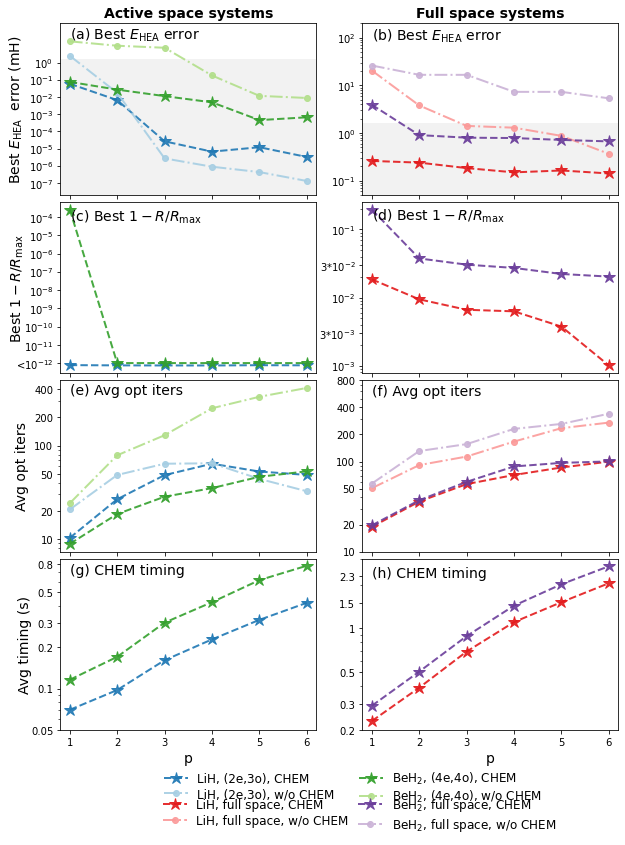

In [27]:
# Figure 5
mol = ['lih', 'beh2', 'lih_full', 'beh2_full']
labels = ['LiH, (2e,3o)', 'BeH$_2$, (4e,4o)', 'LiH, full space', 'BeH$_2$, full space']
chem_acc = [1/0.6275, 1/0.6275]
fig, axes = plt.subplots(4,2, figsize=(10,13), sharex = True)
sns.color_palette('Paired')
colors = sns.color_palette('Paired')
colors[7] =colors[9]
colors[6] =colors[8]
colors[-2] = '#c99504' 

timing = np.load('results/timing.npy', allow_pickle=True).item()
maxr = np.load('results/max_reward.npy', allow_pickle=True).item()
beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()
truee = np.load('results/energies.npy', allow_pickle=True).item()
iters = np.load('results/opt_iters.npy', allow_pickle=True).item()
y_opt = {}
y_avg = {}
rand_avg = {}
score_opt = {}
for j in range(len(mol)):
    y_opt[j] = []
    y_avg[j] = []
    rand_avg[j] = []
    score_opt[j] = []
    for i in range(1,7):
        y_opt[j].append(min(1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol[j], i), allow_pickle=True).item()['y'], truee[mol[j]][3])))
        y_avg[j].append(np.mean(1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol[j], i), allow_pickle=True).item()['y'], truee[mol[j]][3])))
        rand_avg[j].append(np.mean(1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol[j], i), allow_pickle=True).item()['y'], truee[mol[j]][3])))
        score_opt[j].append(1e-12+1-(max(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol[j], i), allow_pickle=True).item()['score'])/maxr[mol[j]])**2)
    if j < 2:
        pos = [0, j-1]
    else:
        pos = [1, j-2]
    if j >=2:
        cid = j-2
    else:
        cid = j
    axes[0][pos[0]].plot(np.arange(1,7), y_opt[j], color = colors[2*j+1], linestyle='--', marker = '*', markersize=12, linewidth=2, alpha =0.9, label = '{}, CHEM'.format(labels[j]))
    axes[0][pos[0]].plot(np.arange(1,7), 1000*np.subtract(beste[mol[j]], truee[mol[j]][3]), linestyle='dashdot', marker = '.',markersize=12,  color = colors[2*j], linewidth=2, alpha =0.9, label = '{}, w/o CHEM'.format(labels[j]))
    axes[2][pos[0]].plot(np.arange(1,7), iters[mol[j]],marker = '*', linestyle='--', color = colors[2*j+1], markersize=12, linewidth=2, alpha =0.9)
    axes[2][pos[0]].plot(np.arange(1,7), iters['{}_rand'.format(mol[j])], linestyle='dashdot', marker = '.', color = colors[2*j], markersize=12, linewidth=2, alpha =0.9)
    axes[3][pos[0]].plot(np.arange(1,7), timing[mol[j]],marker = '*', linestyle='--', color = colors[2*j+1], markersize=12, linewidth=2, alpha =0.9)
    axes[1][pos[0]].plot(np.arange(1,7), score_opt[j],marker = '*', linestyle='--', color = colors[2*j+1], markersize=12, linewidth=2, alpha =0.9)
#     axes[1][pos[0]].plot(np.arange(1,7), y_avg[j], marker = '*', linestyle='--', color = colors[2*j+1], markersize=12, linewidth=2, alpha =0.9)
#     axes[1][pos[0]].plot(np.arange(1,7), rand_avg[j], marker = '.', linestyle='dashdot', color = colors[2*j], markersize=12, linewidth=2, alpha =0.9)
for i in range(2):
    axes[0][i].fill_between([0.8,6.2], chem_acc, 0, facecolor="grey", alpha=0.1)   

# axes[0].scatter(np.array(score_opt)[choice], np.array(y_opt)[choice], s=14, alpha= 0.25)
axes[0][0].set_ylim([2e-8, 190])
axes[0][0].set_xlim([0.8,6.2])
axes[0][1].set_ylim([5e-2, 200])
# axes[1][0].set_ylim([5e-13, 1e-5])
# axes[1][1].set_ylim([5e-5, 5e-2])
axes[0][0].set_yscale('log')
axes[0][1].set_yscale('log')
axes[1][0].set_yscale('log')
axes[1][1].set_yscale('log')
axes[2][0].set_yscale('log')
axes[2][1].set_yscale('log')
axes[3][0].set_yscale('log')
axes[3][1].set_yscale('log')
axes[0][0].set_ylabel(r'Best $E_{\rm HEA}$  error (mH)',fontsize=14)
axes[1][0].set_ylabel(r'Best $1-R/R_{\rm max}$',fontsize=14)
axes[1][0].yaxis.labelpad = -10
axes[2][0].yaxis.labelpad = 5
axes[3][0].yaxis.labelpad = -1
axes[2][0].set_ylabel('Avg opt iters',fontsize=14)
axes[3][0].set_ylabel('Avg timing (s)',fontsize=14)
# axes[1][0].set_ylim([0.1,0.219])
# axes[1][1].set_ylim([0.13,0.239])
#axes[1][0].set_ylabel('Avg E$_{HEA}$ error (mH)',fontsize=14)
axes[3][0].set_xlabel('p',fontsize=14)
axes[3][1].set_xlabel('p',fontsize=14)
axes[0][0].set_yticks([1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
axes[2][0].set_yticks([400, 200, 100, 50, 20, 10,])
axes[2][1].set_yticks([800, 400, 200, 100, 50, 20, 10,])
axes[3][0].set_yticks([0.05, 0.1, 0.2, 0.3, 0.5, 0.8])
axes[3][1].set_yticks([0.2, 0.3, 0.5, 1, 1.5, 2.3])
axes[1][0].set_yticks([1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4])
axes[1][1].set_yticks([1e-3, 3e-3,1e-2,3e-2,1e-1])
axes[1][0].set_yticklabels(['<10$^{-12}$','10$^{-11}$','10$^{-10}$','10$^{-9}$','10$^{-8}$','10$^{-7}$','10$^{-6}$','10$^{-5}$','10$^{-4}$'])
axes[1][1].set_yticklabels(['10$^{-3}$','3*10$^{-3}$','10$^{-2}$','3*10$^{-2}$','10$^{-1}$'])
axes[2][0].set_yticklabels([400, 200, 100, 50, 20, 10,])
axes[2][1].set_yticklabels([800, 400, 200, 100, 50, 20, 10])
axes[3][0].set_yticklabels([0.05, 0.1, 0.2, 0.3, 0.5, 0.8])
axes[3][1].set_yticklabels([0.2, 0.3, 0.5, 1, 1.5, 2.3])
axes[0][0].text(1,24, r'(a) Best $E_{\rm HEA}$ error', fontsize=14)
axes[0][1].text(1,90, r'(b) Best $E_{\rm HEA}$ error', fontsize=14)
axes[1][0].text(1,6e-5, r'(c) Best $1-R/R_{\rm max}$', fontsize=14)
axes[1][1].text(1,1.4e-1, r'(d) Best $1-R/R_{\rm max}$', fontsize=14)
axes[2][0].text(1,350, '(e) Avg opt iters', fontsize=14)
axes[2][1].text(1,540, '(f) Avg opt iters', fontsize=14)
axes[3][0].text(1,0.68, '(g) CHEM timing', fontsize=14)
axes[3][1].text(1,2.25, '(h) CHEM timing', fontsize=14)
lgd = axes[0][0].legend(ncol=2, frameon=False,fancybox=False,bbox_to_anchor=(1.925,-3.29),labelspacing=0.2, fontsize=12)
lgd1 = axes[0][1].legend(ncol=2, frameon=False,fancybox=False,bbox_to_anchor=(0.8,-3.445),columnspacing=0.82, labelspacing=0.2, fontsize=12)
plt.subplots_adjust(hspace=0.04, wspace=0.18)
axes[0][0].set_title('Active space systems', fontsize=14,fontweight="bold") 
axes[0][1].set_title('Full space systems', fontsize=14,fontweight="bold") 
plt.savefig('figures/stats_comp.pdf', bbox_extra_artists=(lgd1,), bbox_inches='tight')
plt.show()


## SI figures

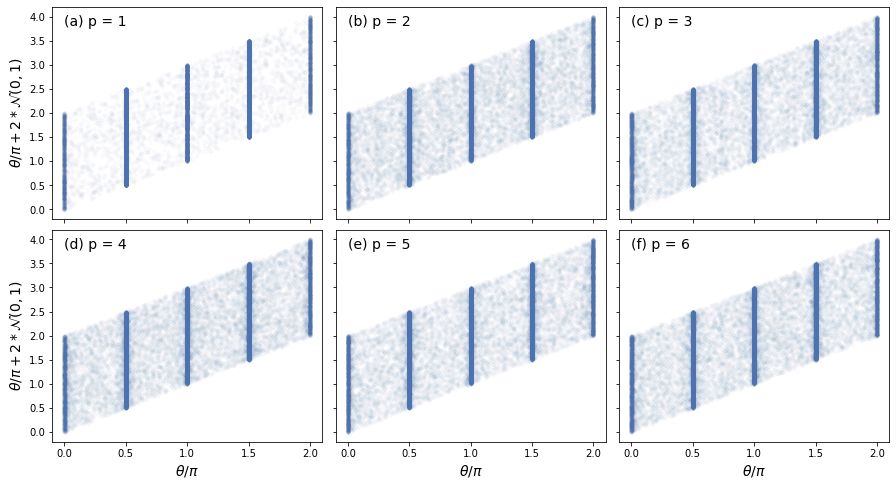

In [29]:
# SI Figure 1
mol = 'beh2_full'
fig, axes = plt.subplots(2,3, figsize=(15,8), sharey = True, sharex = True)
axes[0][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][2].set_prop_cycle('color', sns.color_palette("deep", 10))

for i in range(1,7):
    data = np.load('results/random_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['x']
    data = np.vstack(data).ravel()%(2*np.pi)
    if i == 1:
        sample_size = len(data)
    else:
        data = np.random.choice(data, sample_size, replace=False)
    if i < 4:
        pos = [0, i-1]
    else:
        pos = [1, i-4]
    axes[pos[0]][pos[1]].scatter(data/np.pi, data/np.pi+2*np.random.random(len(data)), s=12, alpha = 0.02)
axes[0][0].set_ylabel(r'$\theta/\pi + 2*\mathcal{N}(0,1)$', fontsize=14)
axes[1][0].set_ylabel(r'$\theta/\pi + 2*\mathcal{N}(0,1)$', fontsize=14)
axes[1][0].set_xlabel(r'$\theta/\pi$', fontsize=14)
axes[1][1].set_xlabel(r'$\theta/\pi$', fontsize=14)
axes[1][2].set_xlabel(r'$\theta/\pi$', fontsize=14)

axes[0][0].text(0,3.8, '(a) p = 1', fontsize=14)
axes[0][1].text(0,3.8, '(b) p = 2', fontsize=14)
axes[0][2].text(0,3.8, '(c) p = 3', fontsize=14)
axes[1][0].text(0,3.8, '(d) p = 4', fontsize=14)
axes[1][1].text(0,3.8, '(e) p = 5', fontsize=14)
axes[1][2].text(0,3.8, '(f) p = 6', fontsize=14)

plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig('figures/opt_parameter_dist_{}.png'.format(mol))
plt.show()


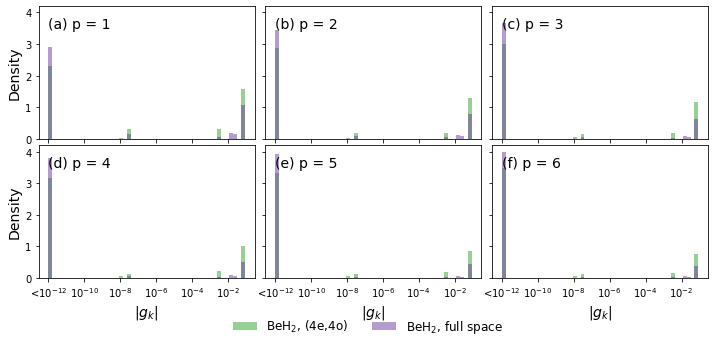

In [188]:
# SI Figure S2
mol = 'beh2'
mol1 = 'beh2_full'
colors = sns.color_palette('Paired')
fig, axes = plt.subplots(2,3, figsize=(12,5), sharey = True, sharex = True)
axes[0][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[0][2].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][0].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][1].set_prop_cycle('color', sns.color_palette("deep", 10))
axes[1][2].set_prop_cycle('color', sns.color_palette("deep", 10))
percent = []
for i in range(1,7):
    data = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol, i), allow_pickle=True).ravel())+1e-12
    data1 = abs(np.load('results/clifford_autotransform/{}/{}_grads.npy'.format(mol1, i), allow_pickle=True).ravel())+1e-12
    percent.append([sum(i<1e-6 for i in data)/len(data), sum(i<1e-6 for i in data1)/len(data1)])
    if i == 1:
        sample_size = len(data)
    else:
        data = np.random.choice(data, sample_size, replace=False)
    if i < 4:
        pos = [0, i-1]
    else:
        pos = [1, i-4]
    axes[pos[0]][pos[1]].hist(np.log10(data), bins=50, alpha = 0.5, color=colors[3],density=True, label = 'BeH$_2$, (4e,4o)')
    axes[pos[0]][pos[1]].hist(np.log10(data1), bins=50, alpha = 0.5, color=colors[9], density=True, label = 'BeH$_2$, full space')

percent = np.vstack(percent)
lgd = plt.legend(ncol=2, frameon=False,fancybox=False,bbox_to_anchor=(0.1,-0.22),labelspacing=0.2, fontsize=12)
axes[0][0].set_ylabel('Density', fontsize=14)
axes[1][0].set_ylabel('Density', fontsize=14)
axes[1][0].set_xlabel('$|g_k|$', fontsize=14)
axes[1][1].set_xlabel('$|g_k|$', fontsize=14)
axes[1][2].set_xlabel('$|g_k|$', fontsize=14)
# plt.yscale('log', nonposy='clip')
axes[1][0].set_xticks([-12, -10, -8, -6, -4, -2])
axes[1][0].set_xticklabels(['<10$^{-12}$','10$^{-10}$', '10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$',])
axes[1][1].set_xticks([-12, -10, -8, -6, -4, -2])
axes[1][1].set_xticklabels(['<10$^{-12}$','10$^{-10}$', '10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$',])
axes[1][2].set_xticks([-12, -10, -8, -6, -4, -2])
axes[1][2].set_xticklabels(['<10$^{-12}$','10$^{-10}$', '10$^{-8}$','10$^{-6}$','10$^{-4}$','10$^{-2}$',])

axes[0][0].text(-12,3.5, '(a) p = 1', fontsize=14)
axes[0][1].text(-12,3.5, '(b) p = 2', fontsize=14)
axes[0][2].text(-12,3.5, '(c) p = 3', fontsize=14)
axes[1][0].text(-12,3.5, '(d) p = 4', fontsize=14)
axes[1][1].text(-12,3.5, '(e) p = 5', fontsize=14)
axes[1][2].text(-12,3.5, '(f) p = 6', fontsize=14)
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.savefig('figures/si_grad_dist_{}.pdf'.format(mol), bbox_extra_artists=(lgd, ), bbox_inches='tight')
plt.show()


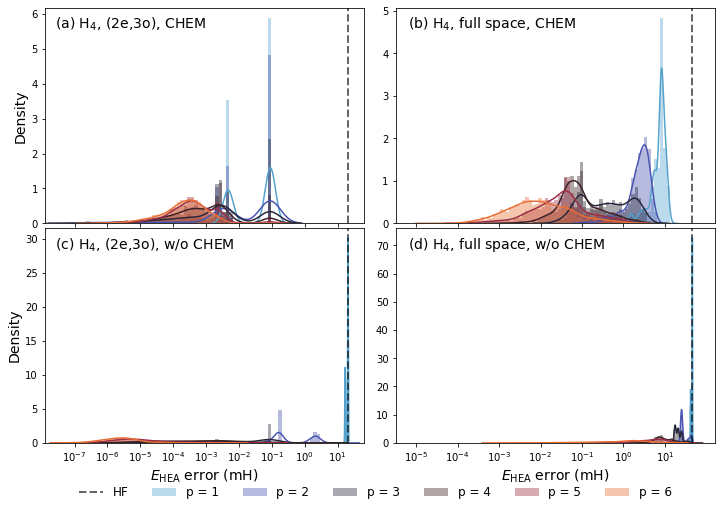

In [37]:
# SI Figure S3
mol = 'h4'
mol1 = 'h4_full'
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,8))
colors = sns.color_palette('icefire',6)

beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol]
beste1 = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol1]
truee = np.load('results/energies.npy', allow_pickle=True).item()[mol]
truee1 = np.load('results/energies.npy', allow_pickle=True).item()[mol1]
yc = {}
yr = {}
yc_rand = {}
yr_rand = {}
for i in range(1,7):
    yc[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    yc_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
minv1 = np.min(list(yc.values()))
maxv1 = np.max(list(yc.values()))
minv = np.min(list(yr.values()))
maxv = np.max(list(yr.values()))
minv1_rand = np.min(list(yc_rand.values()))
maxv1_rand = np.max(list(yc_rand.values()))
minv_rand = np.min(list(yr_rand.values()))
maxv_rand = np.max(list(yr_rand.values()))
for i in range(1,7):
    c = colors[i-1]
    axes[0][1].hist(np.log10(np.array(yc[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),80), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[0][0].hist(np.log10(np.array(yr[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[0][0], data=np.log10(np.array(yr[i])), color = c)
    sns.kdeplot(ax=axes[0][1], data=np.log10(np.array(yc[i])), color = c)
    axes[1][1].hist(np.log10(np.array(yc_rand[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),80), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[1][0].hist(np.log10(np.array(yr_rand[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[1][0], data=np.log10(np.array(yr_rand[i])), color = c)
    sns.kdeplot(ax=axes[1][1], data=np.log10(np.array(yc_rand[i])), color = c)
axes[1][0].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[1][1].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[0][0].set_xlim([-7.9,1.8])
axes[1][0].set_xlim([-7.9,1.8])
axes[0][1].set_xlim([-5.5,2.2])
axes[1][1].set_xlim([-5.5,2.2])
axes[0][0].set_xticks([-7,-6,-5,-4,-3,-2,-1,0,1])
axes[0][1].set_xticks([-5, -4, -3, -2,-1,0, 1,])
axes[1][0].set_xticks([-7,-6,-5,-4,-3,-2,-1,0,1])
axes[1][0].set_xticklabels(['10$^{-7}$','10$^{-6}$','10$^{-5}$','10$^{-4}$','10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$',])
axes[1][1].set_xticks([-5, -4, -3, -2,-1,0, 1,])
axes[1][1].set_xticklabels(['10$^{-5}$','10$^{-4}$', '10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$'])
axes[0][0].set_ylabel('Density',fontsize=14)
axes[0][1].set_ylabel('',fontsize=14)
axes[1][0].set_ylabel('Density',fontsize=14)
axes[1][1].set_ylabel('',fontsize=14)
plt.subplots_adjust(hspace=0.02, wspace=0.1)
axes[0][0].text(-7.6, 5.6, '(a) H$_4$, (2e,3o), CHEM', fontsize=14)
axes[0][1].text(-5.2, 4.6, '(b) H$_4$, full space, CHEM', fontsize=14)
axes[1][0].text(-7.6, 28.5, '(c) H$_4$, (2e,3o), w/o CHEM', fontsize=14)
axes[1][1].text(-5.2, 69, '(d) H$_4$, full space, w/o CHEM', fontsize=14)
axes[0][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[0][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
lgd = plt.legend(ncol=7, frameon=False,fancybox=False,bbox_to_anchor=(0.9,-0.15),labelspacing=0.2, fontsize=12)
plt.savefig('figures/new_rand_comp_{}.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

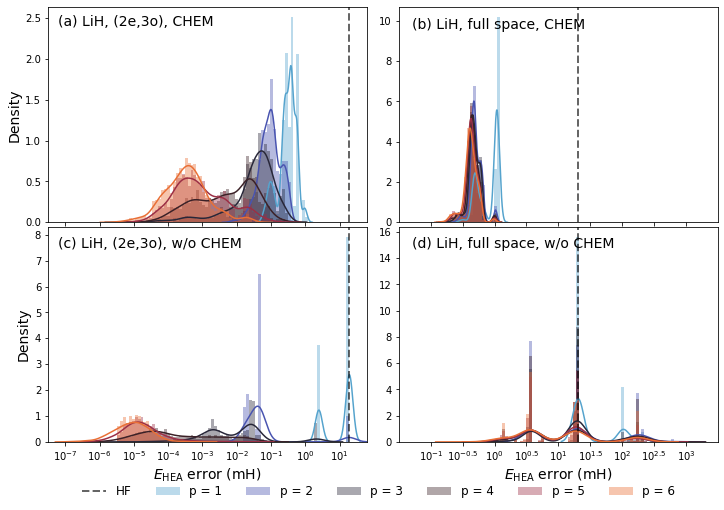

In [41]:
# SI Figure S4
mol = 'lih'
mol1 = 'lih_full'
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,8))
colors = sns.color_palette('icefire',6)

beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol]
beste1 = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol1]
truee = np.load('results/energies.npy', allow_pickle=True).item()[mol]
truee1 = np.load('results/energies.npy', allow_pickle=True).item()[mol1]
yc = {}
yr = {}
yc_rand = {}
yr_rand = {}
for i in range(1,7):
    yc[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    yc_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol1, i), allow_pickle=True).item()['y'], truee1[3])
    yr_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
minv1 = np.min(list(yc.values()))
maxv1 = np.max(list(yc.values()))
minv = np.min(list(yr.values()))
maxv = np.max(list(yr.values()))
minv1_rand = np.min(list(yc_rand.values()))
maxv1_rand = np.max(list(yc_rand.values()))
minv_rand = np.min(list(yr_rand.values()))
maxv_rand = np.max(list(yr_rand.values()))
for i in range(1,7):
    c = colors[i-1]
    axes[0][1].hist(np.log10(np.array(yc[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),80), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[0][0].hist(np.log10(np.array(yr[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[0][0], data=np.log10(np.array(yr[i])), color = c)
    sns.kdeplot(ax=axes[0][1], data=np.log10(np.array(yc[i])), color = c)
    axes[1][1].hist(np.log10(np.array(yc_rand[i])), bins = np.linspace(np.log10(minv1),np.log10(maxv1_rand),80), density=True, label ='p = {}'.format(i), alpha = 0.4,color = c)
    axes[1][0].hist(np.log10(np.array(yr_rand[i])), bins = np.linspace(np.log10(minv),np.log10(maxv_rand),80), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[1][0], data=np.log10(np.array(yr_rand[i])), color = c)
    sns.kdeplot(ax=axes[1][1], data=np.log10(np.array(yc_rand[i])), color = c)
axes[1][0].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[1][1].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[0][0].set_xlim([-7.5,1.8])
axes[1][0].set_xlim([-7.5,1.8])
axes[0][1].set_xlim([-1.5,3.5])
axes[1][1].set_xlim([-1.5,3.5])
axes[0][0].set_xticks([-7,-6,-5,-4,-3,-2,-1,0,1])
axes[0][1].set_xticks([-1,-0.5,0,0.5, 1,1.5,2,2.5,3])
axes[1][0].set_xticks([-7,-6,-5,-4,-3,-2,-1,0,1])
axes[1][0].set_xticklabels(['10$^{-7}$','10$^{-6}$','10$^{-5}$','10$^{-4}$','10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$',])
axes[1][1].set_xticks([-1,-0.5,0,0.5, 1,1.5,2,2.5,3])
axes[1][1].set_xticklabels(['10$^{-1}$','10$^{-0.5}$', '10$^{0}$','10$^{0.5}$','10$^{1}$','10$^{1.5}$','10$^{2}$','10$^{2.5}$','10$^{3}$'])
axes[0][0].set_ylabel('Density',fontsize=14)
axes[0][1].set_ylabel('',fontsize=14)
axes[1][0].set_ylabel('Density',fontsize=14)
axes[1][1].set_ylabel('',fontsize=14)
plt.subplots_adjust(hspace=0.02, wspace=0.1)
axes[0][0].text(-7.2, 2.4, '(a) LiH, (2e,3o), CHEM', fontsize=14)
axes[0][1].text(-1.3, 9.6, '(b) LiH, full space, CHEM', fontsize=14)
axes[1][0].text(-7.2, 7.5, '(c) LiH, (2e,3o), w/o CHEM', fontsize=14)
axes[1][1].text(-1.3, 14.8, '(d) LiH, full space, w/o CHEM', fontsize=14)
axes[0][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[0][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1][1].axvline(x = np.log10(1000* (truee1[0]-truee1[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
lgd = plt.legend(ncol=7, frameon=False,fancybox=False,bbox_to_anchor=(0.9,-0.15),labelspacing=0.2, fontsize=12)
plt.savefig('figures/new_rand_comp_{}.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


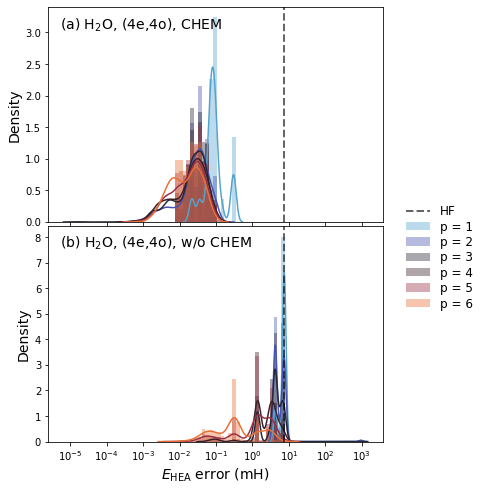

In [44]:
# SI Figure S6
mol = 'h2o_4e4o'
import seaborn as sns

fig, axes = plt.subplots(2,1, figsize=(6,8),sharex=True)
colors = sns.color_palette('icefire',6)

beste = np.load('results/best_hea_energies.npy', allow_pickle=True).item()[mol]
truee = np.load('results/energies.npy', allow_pickle=True).item()[mol]
yr_random = {}
yr = {}
for i in range(1,7):
    yr[i] = 1000* np.subtract(np.load('results/clifford_autotransform/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
    yr_rand[i] = 1000* np.subtract(np.load('results/random_init/{}/{}.npy'.format(mol, i), allow_pickle=True).item()['y'], truee[3])
minv = np.min(list(yr.values()))
maxv = np.max(list(yr.values()))
minv_rand = np.min(list(yr_rand.values()))
maxv_rand  = np.max(list(yr_rand.values()))
for i in range(1,7):
    c = colors[i-1]
    axes[0].hist(np.log10(np.array(yr[i])), bins = np.linspace(np.log10(minv_rand),np.log10(maxv_rand),50), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[0], data=np.log10(np.array(yr[i])), color = c)
    axes[1].hist(np.log10(np.array(yr_rand[i])), bins = np.linspace(np.log10(minv_rand),np.log10(maxv_rand),50), density=True, label = 'p = {}'.format(i), alpha = 0.4,color = c)
    sns.kdeplot(ax=axes[1], data=np.log10(np.array(yr_rand[i])), color = c)
axes[1].set_xlabel(r'$E_{\rm HEA}$ error (mH)',fontsize=14)
axes[1].set_xticks([-5,-4,-3,-2,-1,0,1,2,3])
axes[1].set_xticklabels(['10$^{-5}$','10$^{-4}$','10$^{-3}$','10$^{-2}$', '10$^{-1}$','10$^{0}$','10$^{1}$','10$^{2}$','10$^{3}$'])
axes[0].set_ylabel('Density',fontsize=14)
axes[1].set_ylabel('Density',fontsize=14)
plt.subplots_adjust(hspace=0.02, wspace=0.1)
axes[0].text(-5.3, 3.05, '(a) H$_2$O, (4e,4o), CHEM', fontsize=14)
axes[1].text(-5.3, 7.6, '(b) H$_2$O, (4e,4o), w/o CHEM', fontsize=14)
axes[0].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
axes[1].axvline(x = np.log10(1000* (truee[0]-truee[3])), color = 'k', linewidth=2, linestyle='dashed', label='HF', alpha = 0.6)
lgd = plt.legend(ncol=1, frameon=False,fancybox=False,bbox_to_anchor=(1.3,1.15),labelspacing=0.2, fontsize=12)
plt.savefig('figures/new_rand_comp_{}.pdf'.format(mol), bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()